# Basic models to analyze the data 

In [10]:
%matplotlib inline

import numpy as np
from get_data import *
from matplotlib import pyplot as plt

In [4]:
X = []
y = []

tempX, tempY = get_data('consumerDiscretionary')
X.append(tempX)
y.append(tempY)

tempX, tempY = get_data('consumerStaples')
X.append(tempX)
y.append(tempY)

tempX, tempY = get_data('industrials')
X.append(tempX)
y.append(tempY)

In [5]:
from sklearn.decomposition import PCA

## PCA eigenvectors:

In [6]:
# PCA analysis:
XPca = []

pca = PCA(n_components=2).fit(X[0])
XPca.append( pca.transform( X[0] ) )

pca = PCA(n_components=2).fit(X[1])
XPca.append( pca.transform( X[1] ) )

pca = PCA(n_components=2).fit(X[2])
XPca.append( pca.transform( X[2] ) )

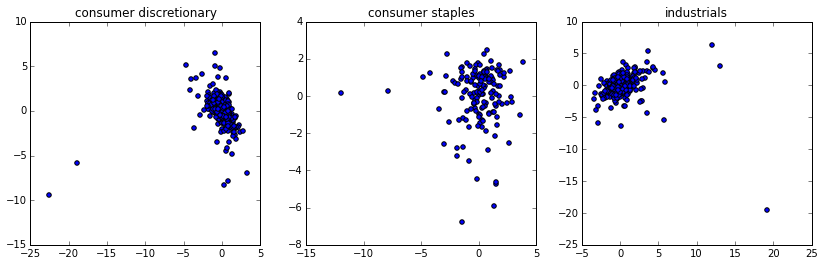

In [7]:
plt.figure(figsize=(14,4))

plt.subplot(1, 3, 1)
plt.scatter(XPca[0][:, 0], XPca[0][:, 1])
plt.title('consumer discretionary')

plt.subplot(1, 3, 2)
plt.scatter(XPca[1][:, 0], XPca[1][:, 1])
plt.title('consumer staples')

plt.subplot(1, 3, 3)
plt.scatter(XPca[2][:, 0], XPca[2][:, 1])
plt.title('industrials')

## Linear ridge regression

In [57]:
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split

In [58]:
# range of regularization parameters:
alphas = np.logspace(-4, 2, 30)
kf = KFold(3)

ridgeCV = RidgeCV(alphas=alphas)

for k in range(nFolds):
    XTrain, XTest, yTrain, yTest = train_test_split(X[0], y[0], test_size=0.333)    
    ridgeCV.fit(XTrain, yTrain)
    score = ridgeCV.score(XTest, yTest)
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, ridgeCV.alpha_, score))

[fold 0] alpha: 100.00000, score: -0.00710
[fold 1] alpha: 100.00000, score: -0.15111
[fold 2] alpha: 100.00000, score: -0.01047
